In [4]:
import pandas as pd
df=pd.read_csv("/home/parth/MLOPS/multi-disease-predictor/data/raw/heart.csv")
df



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load dataset


# Label Encoding for binary categorical columns
df["Sex"] = df["Sex"].map({"M": 1, "F": 0})  # Male → 1, Female → 0
df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0})  # Yes → 1, No → 0

# One-Hot Encoding for multi-class categorical columns
df = pd.get_dummies(df, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True).astype(int)


# Display encoded data
print(df.head())
df.to_csv('../data/processed/cleaned_heart.csv',index=False)


   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0        0             0                  1                  0   
1        1             1                  0                  1   
2        0             0                  1                  0   
3        1             1                  0                  0   
4        0             0                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0                 0                  1              0              0   
1                 0 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df.drop(columns=['HeartDisease'])
Y=df['HeartDisease']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [48]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [49]:

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, Y_train)

LogisticRegression(random_state=42)

In [50]:
y_pred = lr.predict(X_test_scaled)

In [51]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(Y_test,y_pred)
print(f"Accuracy: {acc*100} %")


Accuracy: 85.32608695652173 %


In [52]:
# Display classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



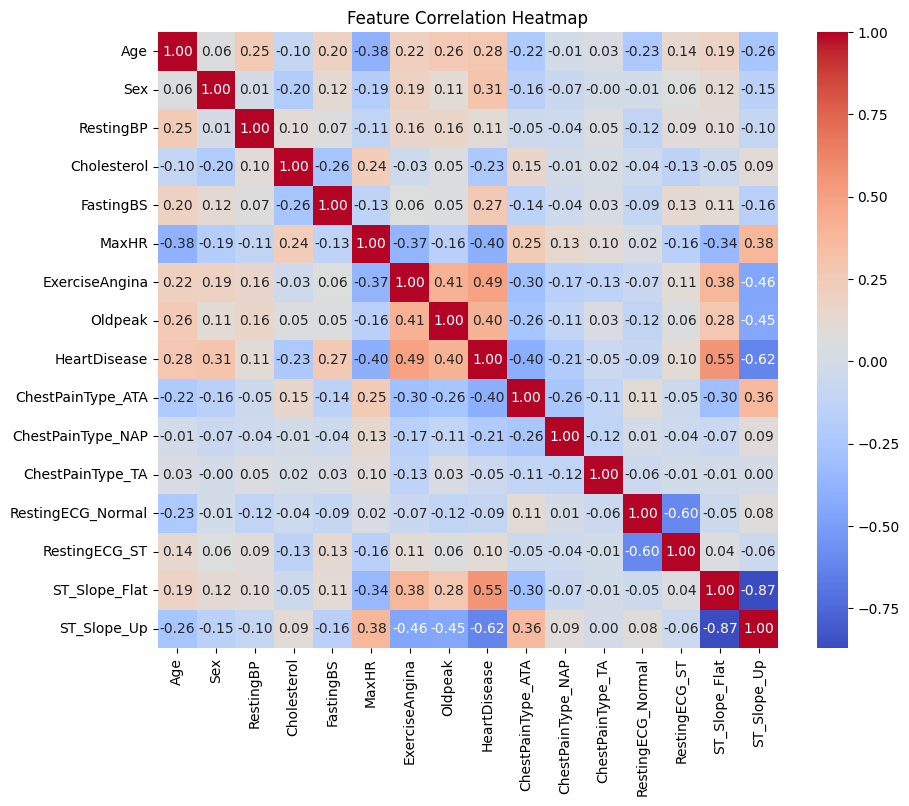

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()